# First load the model + scalers

In [52]:
# standing data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
# persistence
from sklearn.externals import joblib

plt.style.use('seaborn-white')
%matplotlib inline
#%matplotlib notebook

In [53]:
scaler,regr=joblib.load('ols.pkl')
print 'scaler:',scaler.mean_
print
print 'coefficients:', regr.intercept_, regr.coef_

scaler: [  1.51543081e+04   5.47196553e+04   3.52205026e+04   8.80024726e+03
   5.39524656e+01   2.39779826e+01  -8.94360000e+00]

coefficients: 23291.1896 [  1.21676416e+04  -3.09420219e+03   1.88981529e+04  -4.15049926e+02
   1.32563092e+03  -1.46908994e+01  -3.60674872e+02]


In [54]:
#Load the first dataset that Dana ran
data=pd.read_csv('../data/batch1_usable_data.csv')
data.rename(columns={'Runtime(s)':'t','Fill Vol(mm^3)':'Vfil','Support Vol(mm^3)':'Vsup','Layer Height(mm)':'dh','Mesh Volume(mm^3)':'Vmes','BB Vol(mm^3)':'Vbb','CVHull Vol(mm^3)':'Vch','Surface Area(mm^2)':"Sa"},inplace=True)
#data.info()
data.describe()
data.head(1)
print (data.loc[data['Mesh']=='sphere.stl','t']).empty

True


In [55]:
#clean up dataset
Vmax=1000000.
data=data[(data['Vmes']<Vmax)&(data['Vbb']<Vmax)&(data['Vch']<Vmax)]
print len(data)
# test first on the training set
sd=data.head(2500)
print len(sd)

4315
2500


In [56]:
#setup data
sd.to_csv('../data/batch1_usable_validation.csv')
X = sd[['Vmes', 'Vbb','Vch','Sa','X','Z','Euler']].as_matrix()
print X[:,0]
y = sd.t.as_matrix()
X_scaled = scaler.transform(X)

[  4051.93547422   5902.13970662  72994.4117872  ...,   2105.92093523
   2820.34455644  74804.5959289 ]


In [79]:
# now fit
regr = skl_lm.LinearRegression()
regr.fit(X_scaled,y)
print(regr.intercept_)
print(regr.coef_)
lin_rmse = np.sqrt(mean_squared_error(y,regr.predict(X_scaled)))
lin_ame = mean_absolute_error(y,regr.predict(X_scaled))
ymean = np.mean(y)
print 'residual standard error (rse):', lin_rmse, 'residual mean_absolute_error:', lin_ame, '<y>: ', ymean
print 'ratio (ame): ', lin_ame/ymean
print 'R^2 score: ', r2_score(y,regr.predict(X_scaled))

21196.4898794
[ 14891.30971465  -2664.06859213   7288.70524095   1643.22568226
   5103.49516054   3085.72620714     42.99545502]
residual standard error (rse): 31721.364824 residual mean_absolute_error: 10035.6879383 <y>:  35099.6190114
ratio (ame):  0.285920138765
R^2 score:  0.716294336606


2 1


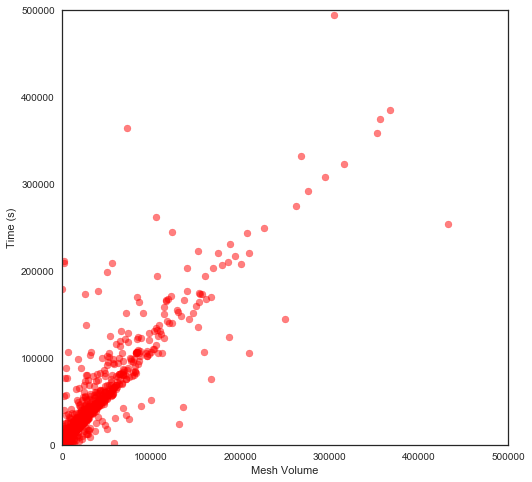

In [80]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=500000
print X.ndim, y.ndim
plt.scatter(X[:,0],y,color='red',alpha=0.5)
plt.xlabel('Mesh Volume')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
#plt.plot(X,regr.predict(X_scaled),color='blue')
plt.savefig('t_vs_Vmes_train.png')

7691.69419646


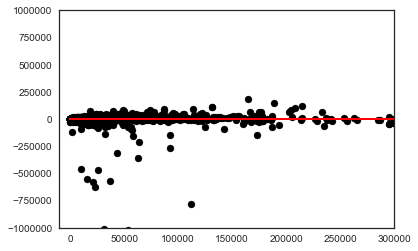

In [65]:
plt.scatter(X[:,0],regr.predict(X_scaled)-y,color='black')
print regr.predict(X_scaled)[0]
plt.xlim(-10000,300000)
plt.ylim(-1000000,1000000)
plt.plot(X[:,0].T,(X[:,0].T)*0,color='red')
plt.savefig('residual_vs_Vmes.png')

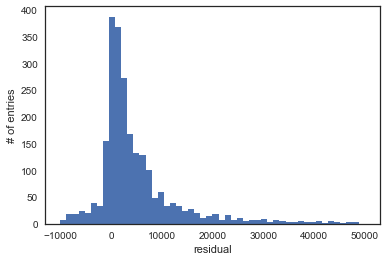

In [66]:
h_res=plt.hist(regr.predict(X_scaled)-y,50,(-10000,50000))
#plt.yscale('log')
plt.ylabel('# of entries')
plt.xlabel('residual')
plt.savefig('residual_histogram.png')

# Now predict based on test data

In [67]:
sdtest=data.tail(len(data)-len(sd))
sdtest=sdtest.head(len(sdtest)-500) # leave 500 as holdout
print len(sdtest)
sdtest.head(1)
sdtest.to_csv('../data/batch1_usable_validation.csv')

1315


1315
2 1


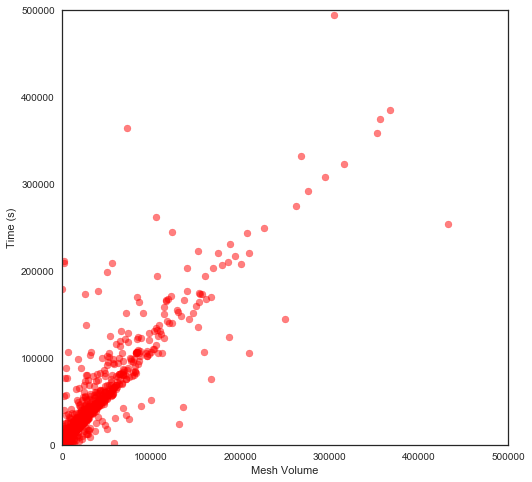

In [85]:
#setup data
X = sdtest[['Vmes', 'Vbb','Vch','Sa','X','Z','Euler']].as_matrix()
y = sdtest.t.as_matrix()
X_scaled = scaler.transform(X)
print len(X)
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=500000
print X.ndim, y.ndim
plt.scatter(X[:,0],y,color='red',alpha=0.5)
plt.xlabel('Mesh Volume')
plt.ylabel('Time (s)')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
#plt.plot(X,regr.predict(X_scaled),color='blue')
plt.savefig('t_vs_Vmes_validation.png')

In [86]:
# now fit with saved model
scaler,regr=joblib.load('ols.pkl')
print 'scaler:',scaler.mean_
print
print 'coefficients:', regr.intercept_, regr.coef_
lin_rmse = np.sqrt(mean_squared_error(y,regr.predict(X_scaled)))
lin_ame = mean_absolute_error(y,regr.predict(X_scaled))
ymean = np.mean(y)
print 'residual standard error (rse):', lin_rmse, 'residual mean_absolute_error:', lin_ame, '<y>: ', ymean
print 'ratio (ame): ', lin_ame/ymean
print 'R^2 score: ', r2_score(y,regr.predict(X_scaled))

scaler: [  1.51543081e+04   5.47196553e+04   3.52205026e+04   8.80024726e+03
   5.39524656e+01   2.39779826e+01  -8.94360000e+00]

coefficients: 23291.1896 [  1.21676416e+04  -3.09420219e+03   1.88981529e+04  -4.15049926e+02
   1.32563092e+03  -1.46908994e+01  -3.60674872e+02]
residual standard error (rse): 37980.4392532 residual mean_absolute_error: 14472.003048 <y>:  35099.6190114
ratio (ame):  0.412312254536
R^2 score:  0.593290569918


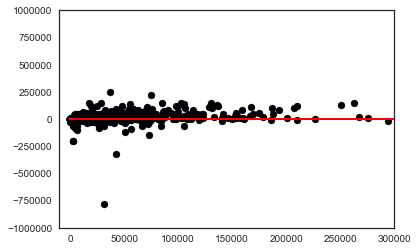

In [84]:
res=regr.predict(X_scaled)-y
plt.scatter(X[:,0],res,color='black')
plt.xlim(-10000,300000)
plt.ylim(-1000000,1000000)
plt.plot(X[:,0].T,(X[:,0].T)*0,color='red')
plt.savefig('residual_validation.png')

In [75]:
for i in range(len(sdtest)):
    mesh=sdtest['Mesh'].iloc[i]
    if mesh=='99899.stl':
        print sdtest['Mesh'].iloc[i], sdtest['t'].iloc[i], res[i]


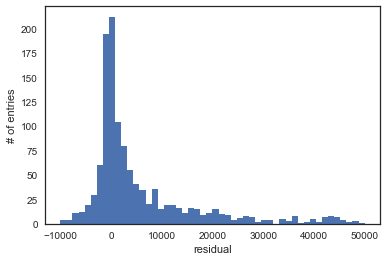

In [87]:
h_res=plt.hist(regr.predict(X_scaled)-y,50,(-10000,50000))
#plt.yscale('log')
plt.ylabel('# of entries')
plt.xlabel('residual')
plt.savefig('residual_histogram_validation.png')

In [88]:
def EstError(y,yhat):
    pos_err = 0.3
    neg_err = 0.3
    ymean=np.mean(y)
    yhatmean=np.mean(yhat)
    print 'ymean:', ymean, 'yhatmean:', yhatmean
    
    y_pos=y[y>=yhat]
    yhat_pos=yhat[y>=yhat]
    y_neg=y[y<yhat]
    yhat_neg=yhat[y<yhat]
    #print len(y_pos), len(yhat_pos)
    #print len(y_neg), len(yhat_neg)
    
    mean_err=ymean-yhatmean
    pos_err=mean_absolute_error(y_pos,yhat_pos)
    neg_err=mean_absolute_error(y_neg,yhat_neg)
    
    print 'mean error: ', mean_err/ymean
    print 'positive error: ', pos_err/ymean, 'negative error:', neg_err/ymean

    return pos_err/ymean, neg_err/ymean

In [89]:
pos_err, neg_err=EstError(y,regr.predict(X_scaled))

ymean: 35099.6190114 yhatmean: 43117.9649645
mean error:  -0.228445384278
positive error:  0.247730465563 negative error: 0.509429440774
